#### Домашнее задание "Случайные марковские процессы"  

* Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов.  
* Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

##### Построим матрицу переходных вероятностей для слов (не букв) в тексте (не по заданию, для опыта)

In [2]:
with open(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Случайные марковские процессы\tom_1.txt',mode='rt', encoding="UTF-8") as f:
    text = f.read().lower()
text = re.sub('[^ а-яё]', '', text)

In [3]:
# уберем лишние пробелы в тексте
regex = re.compile('\s+')
text = regex.sub(' ', text)
text[:200]

'лев толстойвойна и миртом том часть перваячасть ораячасть третья том лев николаевич толстойвойна и миртом часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместья'

In [4]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Urmas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# сделаем свой собственный токенизатор
def tok(text):
    tokens = word_tokenize(text)
    return tokens

In [6]:
vectorizers = CountVectorizer(tokenizer=tok)
X = vectorizers.fit_transform([text])
words = np.array(vectorizers.get_feature_names())
count = np.asarray(X.sum(axis=0)).ravel()

In [7]:
Count_word_dict = dict(zip(words, count))   # слова и их количество в тексте
Count_word_dict['толстойвойна']

2

In [8]:
POS = vectorizers.vocabulary_                # слова и их индексы в матрице X
POS['толстойвойна']

18125

In [9]:
X.shape

(1, 20459)

In [10]:
probabilities = np.zeros((X.shape[1], X.shape[1]))

In [11]:
tok(text)[:15]

['лев',
 'толстойвойна',
 'и',
 'миртом',
 'том',
 'часть',
 'перваячасть',
 'ораячасть',
 'третья',
 'том',
 'лев',
 'николаевич',
 'толстойвойна',
 'и',
 'миртом']

In [12]:
for cp, cn in zip(tok(text)[:-1], tok(text)[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [13]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [14]:
# матрица переходных вероятностей для слов
df = pd.DataFrame(probabilities, index=[c for c in POS.keys()], columns=[c for c in POS.keys()])

In [15]:
#plt.figure(figsize=(10,6))     # не хватает памяти для визуализации тепловой карты
#sns.heatmap(df)
#plt.show()

In [16]:
# выведем список слов в тексте, которые состоят из 4 букв с "п", заканчивая "р"
list_ = re.findall(r'\b[п]\w{2}р\b', str(list(POS.keys())))
list_

['пьер', 'петр']

###### Теперь по заданию построим матрицу переходных вероятностей для букв текста

In [17]:
with open(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Случайные марковские процессы\tom_1.txt',mode='rt', encoding="UTF-8") as f:
    text2 = f.read().lower()
text2 = re.sub('[^а-яё]', '', text2)

In [18]:
text2[:100]

'левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперв'

In [19]:
rus = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(rus)}

In [20]:
probabilities = np.zeros((len(rus), len(rus)))

In [21]:
for cp, cn in zip(text2[:-1], text2[1:]):
    if cp == ' ' or cn == ' ':
        continue
    else:
        probabilities[POS[cp], POS[cn]] += 1

In [22]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [23]:
# строим матрицу переходных вероятностей для букв текста
df = pd.DataFrame(probabilities, index=(c for c in rus), columns=(c for c in rus))

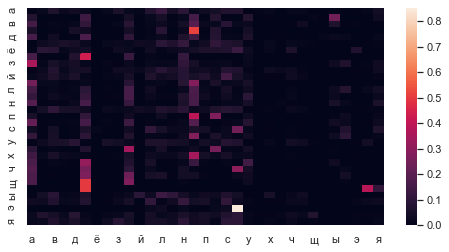

In [24]:
plt.figure(figsize=(8,4))
sns.heatmap(df)
plt.show()

##### Подсчитаем вероятность встретить строку из 4 символов(букв), которое начинается на букву "п" и заканчивается на букву "р"

In [25]:
start = POS['п']
end = POS['р']
prior = 1. / len(rus)
probability = {}
for i in rus:
    for j in rus:
        proba = prior * probabilities[start, POS[i]] * probabilities[POS[i], POS[j]] * probabilities[POS[j], end]    
        if proba > 0:
            probability.setdefault(''.join(['п', i, j, 'р']), proba)

или так

In [26]:
start = POS['п']
end = POS['р']
prior = 1. / len(rus)
probability = {}
for i in rus:
    proba_i = prior * probabilities[start, POS[i]] * probabilities[POS[i], end]
    for j in rus:
        proba_j = proba_i * probabilities[POS[i], POS[j]] * probabilities[POS[j], end]
        proba = proba_i + proba_j
        if proba > 0:
            probability.setdefault(''.join(['п', i, j, 'р']), proba)

##### Используя матрицу переходных вероятностей, сгенерируем слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [27]:
s = ['б']
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(rus), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бстгосив


##### Оценим ВР его через HMM. Попробуем “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [28]:
international_airline_passengers = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\international-airline-passengers.csv')

In [29]:
series = pd.Series(international_airline_passengers['Count'])

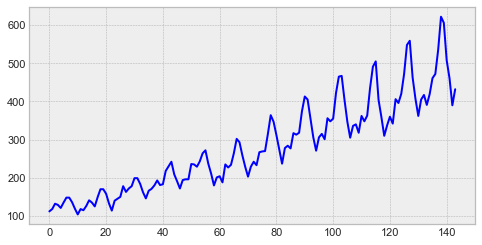

In [30]:
with plt.style.context('bmh'):
    plt.figure(figsize=(8, 4))
    plt.plot(series, color='blue')
    plt.show()

In [31]:
! pip install hmmlearn

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [32]:
from hmmlearn.hmm import GaussianHMM

In [33]:
values = series.values.reshape(-1,1)   # переводим ВР из Series в один столбец array

In [34]:
optimal_n = []
for n in range(1, 25):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    optimal_n.append(model.score(values))

Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 287 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 359 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 398 free scalar parameters with only 144 data points will result in a degenerate solution.
Fitting a model with 439 free scalar parameters with only 144 data points will result in a degenerate so

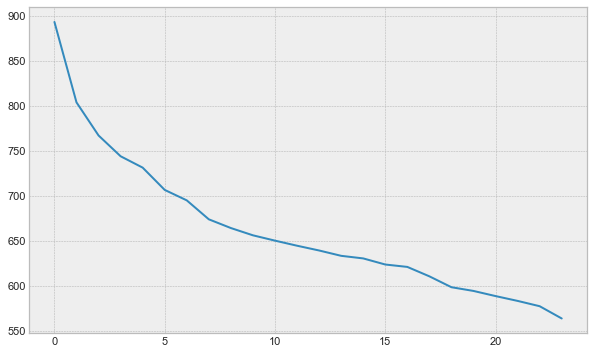

In [35]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(optimal_n*np.array([-1]))

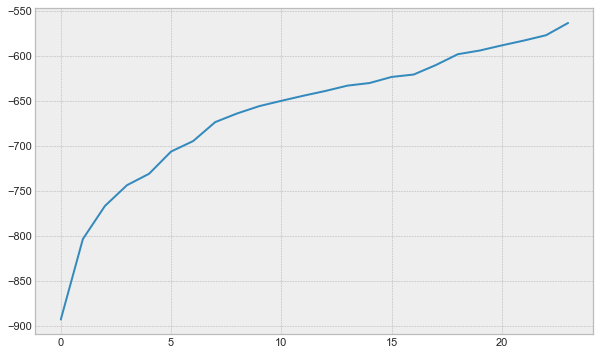

In [36]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10,6))
    plt.plot(optimal_n)

Возьмем n=10

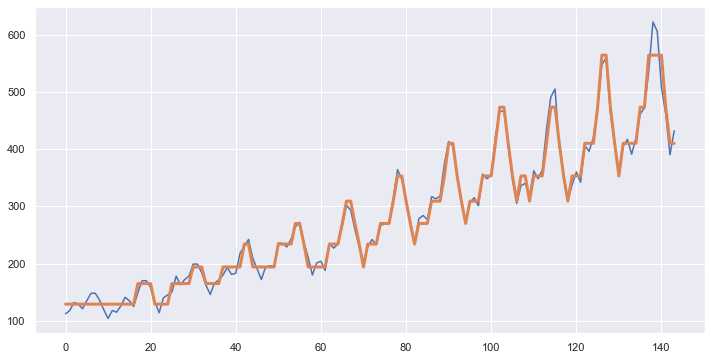

In [37]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [38]:
model.transmat_.shape

(10, 10)

Предскажем 20 следующих значений ряда

In [39]:
prediction=[]
distribution = model.transmat_[labels[-1]]
for i in range(20):
    next_val = np.random.choice(10, p=distribution)
    prediction.append(model.means_[next_val])

In [40]:
new_series = np.concatenate((values, np.array(prediction)))

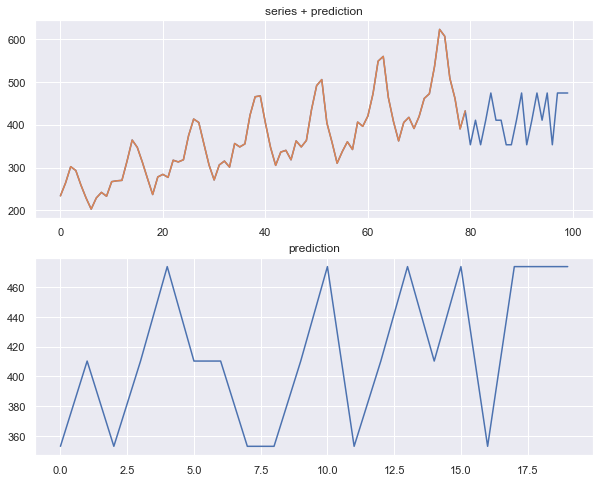

In [41]:
f, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
axs[0].plot(new_series[-100:])
axs[0].plot(values[-80:])
axs[0].set_title('series + prediction')

axs[1].plot(prediction)
axs[1].set_title('prediction')
plt.show()

In [44]:
np.random.seed(42)
X, Z = model.sample(100)

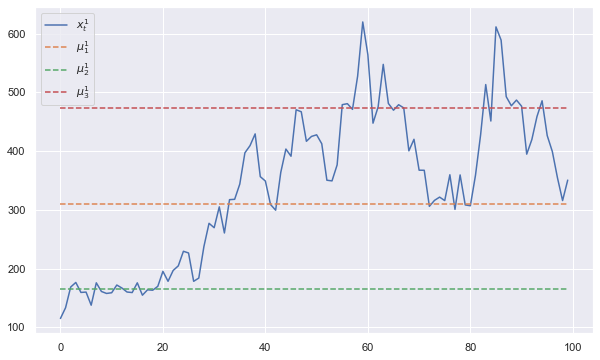

In [46]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
_ = axs.plot(X[:, 0], label='$x^1_t$')
for i in range(3):
    _ = axs.plot(range(len(X)), model.means_[i, 0] * np.ones(len(X)), '--', label='$\mu^1_{}$'.format(i+1))
_ = axs.legend()